# Assumptions and pitfalls of PCA

In this section, we will explore some precautions that you should take before performing PCA.
* PCA assumes that the __scales__ of all features are relatively equal
* PCA assumes __normality__ or at the very least __symmetric__ distributions
* Pitfall : clustering on PCA space is not straight-forward and can give unintuitive results

![pcagifurl](https://i.stack.imgur.com/lNHqt.gif)

## I. PCA is not scale invariant

PCA works to minimize the variance, however variance has units!
<br> What if the units of the data are changed?<br>
Let's see what happens using our old trusty dataset from plants.

In [202]:
# First, let's set up our enviroment
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from pathlib import Path

# figure settings
sns.set_context('notebook', font_scale=1.2)

In [36]:
# Import the dataset
plant_data = pd.read_csv('plant_data.csv', index_col=-1)

In [37]:
plant_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2


Notice, the units of all measurements are in cm. Suppose we decide to measure `sepal width` in mm instead.

In [28]:
# modify  the data to input a scale conversion
scale_factor = 100
plant_data['sepal width (cm)'] = scale_factor * plant_data['sepal width (cm)']

<font color="crimson"> <b> <i>EXERCISE :  </i></b>
    Run a PCA analysis and compare the loading plot from notebook 1 to the new loading plot
</font> 

In [ ]:
# import PCA object class from sklearn


In [ ]:
# select the data to be used for PCA


In [ ]:
# perform PCA projection on 2 dimensions
projected_data = 

In [ ]:
# create a dataframe for ease of data manipulation
projected_df = pd.DataFrame(data = projected_data, columns=['PC1', 'PC2']) # these are the principal component axes

In [ ]:
# visualize the coefficients in the loading plot
plt.figure(figsize=(10,5))
sns.heatmap(                       ,             # components_ attribute of pca object
            square=True, annot=True,             # add coefficient values in plot with annot
            xticklabels=                     ,   # label original feature names
            yticklabels=['PC1', 'PC2'],          # PC number
            cmap='seismic',                      # colorscale
            vmin=-1, vmax=1)                     # min,max values of colorscale
plt.title(f'PCA Loading plot scale {scale_factor}', y=1.05)
plt.show()

<font color="blue"> 
    hint : The PC1 coefficient of sepal width in the original loading plot was -0.085. Did it increase or decrease on increasing the scale factor?
</font> 

<font color="crimson"> <b> <i>EXERCISE :  </i></b>
    Try a scaling factor of 0.1, and predict the change in loading factor
</font> 

In [29]:
# Import the dataset again
plant_data = pd.read_csv('plant_data.csv', index_col=-1)

# new scale factor 
scale_factor = 0.1

# modify the feature column
plant_data['sepal width (cm)'] = scale_factor * plant_data['sepal width (cm)']

In [30]:
# Perform PCA on scaled data








In [ ]:
# visualize the coefficients in the loading plot
plt.figure(figsize=(10,5))
sns.heatmap(                       ,             # components_ attribute of pca object
            square=True, annot=True,             # add coefficient values in plot with annot
            xticklabels=                     ,   # label original feature names
            yticklabels=['PC1', 'PC2'],          # PC number
            cmap='seismic',                      # colorscale
            vmin=-1, vmax=1)                     # min,max values of colorscale
plt.title(f'PCA Loading plot scale {scale_factor}', y=1.05)
plt.show()

### __Correcting for scale - data standardization__
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [31]:
from sklearn.preprocessing import StandardScaler

In [38]:
# import the data
plant_data = pd.read_csv('plant_data.csv', index_col=-1)

In [40]:
# standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(plant_data)

In [42]:
# convert to dataframe for ease of use
scaled_df = pd.DataFrame(data = scaled_features, columns=plant_data.columns, index=plant_data.index)

In [ ]:
# Perform PCA on standardized data






In [ ]:
# visualize the coefficients in the loading plot
plt.figure(figsize=(10,5))
sns.heatmap(                       ,             # components_ attribute of pca object
            square=True, annot=True,             # add coefficient values in plot with annot
            xticklabels=                     ,   # label original feature names
            yticklabels=['PC1', 'PC2'],          # PC number
            cmap='seismic',                      # colorscale
            vmin=-1, vmax=1)                     # min,max values of colorscale
plt.title(f'PCA Loading plot after Standardization', y=1.05)
plt.show()

## II. PCA assumes normal or symmetric distributions

__Rationale__ : 
* Variance is a really good measure of "spread" for symmetric distributions. But it can fail when we consider skewed or asymmetric distributions.
* PCA assumes that the distribution of whatever we are explaining can be described by a mean (of zero) and variance alone - this can only be the Normal distribution.
* PCA works on the covariance (or correlation) matrix. the Pearson product-moment correlation assesses the linear relationship between two variables; if your variables are related, but not linearly, then correlation is not an ideal metric to index the strength of the relationship.
 

__Test__
* Import the datasets `standardized_rna_data.csv` and `standardized_protein_data.csv`
* The RNA data is normally distributed, while the protein data is log-normally distributed
* 5 rna (or protein) species were chosen such that there is no true correlation between them.
</font> 

<font color="crimson"> <b> <i>EXERCISE :  </i></b>
    If there is no correlation between features i.e. data is randomly distributed, will PCA be able to reduce the dimensionality of this data? Type your answer in the chat.
</font> 

### __Data structure__

In [88]:
# Import RNA and protein data and look at the pairplots
rna = pd.read_csv('standardized_rna_data.csv')
protein = pd.read_csv('standardized_protein_data.csv')

<Figure size 432x288 with 0 Axes>

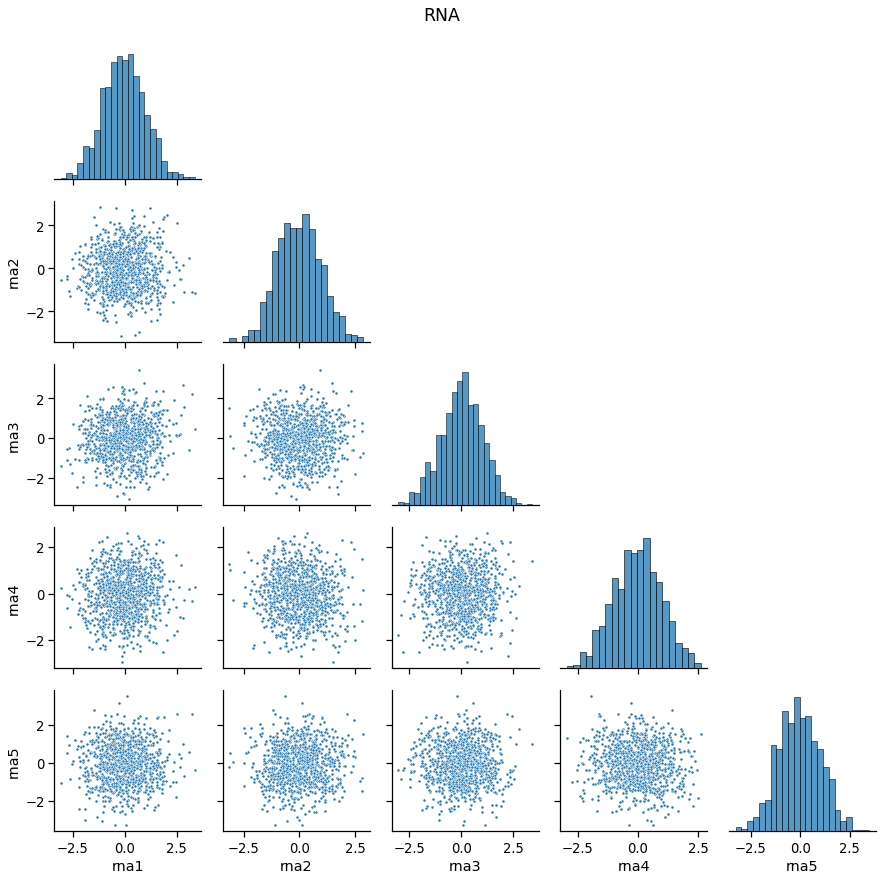

<Figure size 432x288 with 0 Axes>

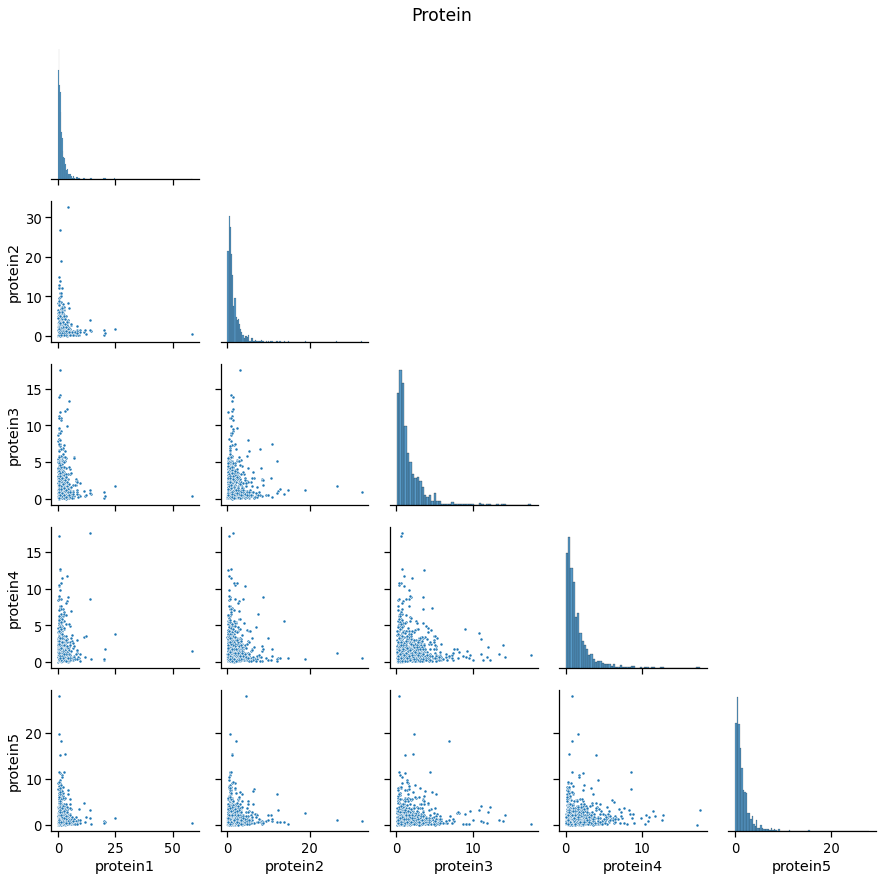

In [101]:
# Plot RNA data
plt.figure()
sns.pairplot(rna, markers='.',corner=True);
plt.suptitle('RNA')
plt.tight_layout()
plt.show()

# Plot protien data
plt.figure()
sns.pairplot(protein, markers='.', corner=True);
plt.suptitle('Protein')
plt.tight_layout()
plt.show()

### __PCA__

Lets run PCA on the `rna` dataset

In [78]:
from sklearn.decomposition import PCA

In [102]:
pca_rna = PCA(n_components=2)
pca_rna_projected = pca_rna.fit_transform(rna)
projected_rna = pd.DataFrame(data = pca_rna_projected, columns=['PC1', 'PC2'])
projected_rna.head(2)

,PC1,PC2
0,-0.538403,-0.817180
1,-0.923596,0.582938


<font color="crimson"> <b> <i>EXERCISE :  </i></b>
    Run PCA on the protein dataset as above
</font> 

In [ ]:
# fill in the details
pca_protein = 
pca_protein_projected = 
projected_protein = pd.DataFrame(data = pca_protein_projected, columns=['PC1', 'PC2'])
projected_protein.head(2)

### __Visualize PCA scatter plot__

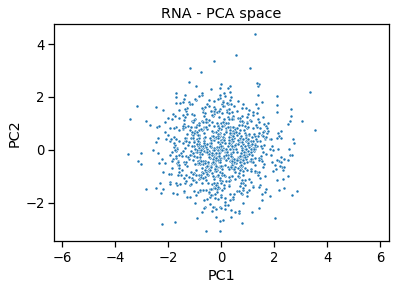

In [114]:
plt.figure()
sns.scatterplot(data=projected_rna, x='PC1', y='PC2', marker='.')
plt.axis('equal')
plt.title('RNA - PCA space')
plt.show()

In [ ]:
# Visualize a similar scatter plot for the protein data now





<font color="crimson"> <b> <i>EXERCISE :  </i></b>
    Do you see any structure emerging in the Protein PCA plot? Type your answer in the chat.
</font> 

### __Correcting for skewness - data transformation__


Sometimes a simple log transform can make the data symmetric enough for PCA to be a useful tool.

In [115]:
transformed_protein = np.log(protein)

<Figure size 432x288 with 0 Axes>

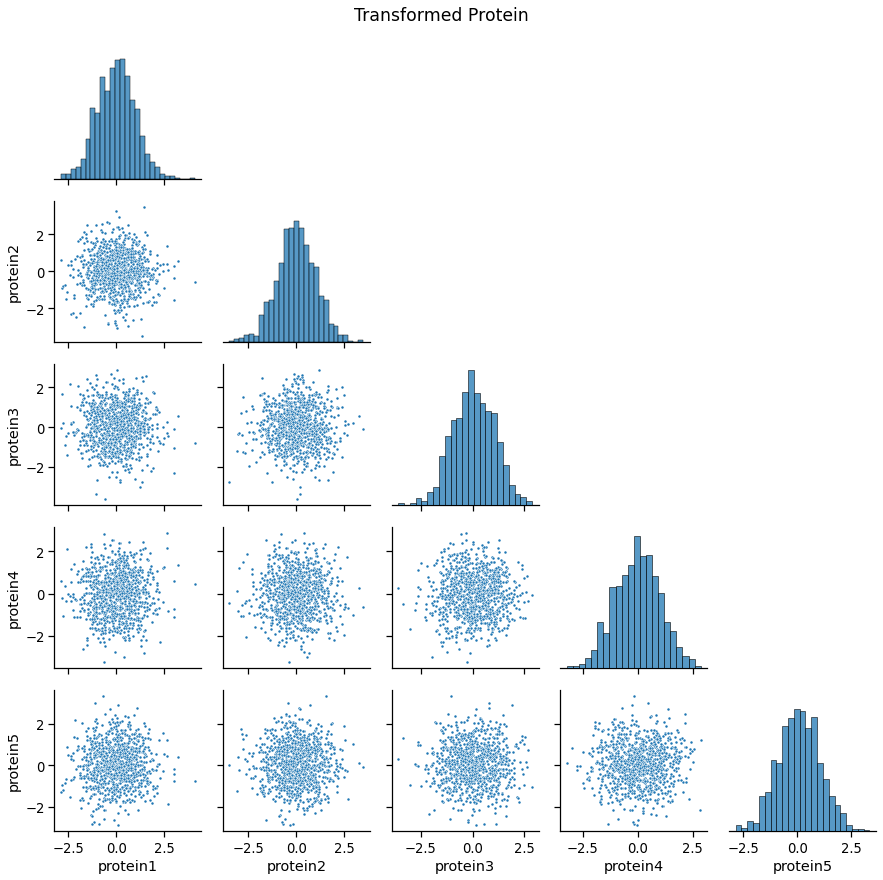

In [118]:
# Plot protien data
plt.figure()
sns.pairplot(transformed_protein, markers='.', corner=True);
plt.suptitle('Transformed Protein')
plt.tight_layout()
plt.show()

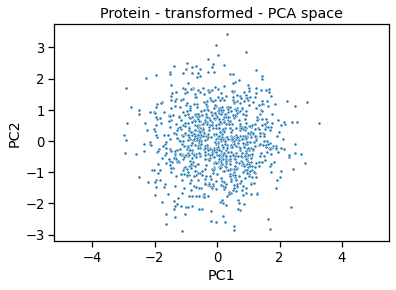

In [120]:
# PCA on transformed data
pca_protein_transformed = PCA(n_components=2)
pca_protein_projected = pca_protein_transformed.fit_transform(transformed_protein)
projected_protein_transformed = pd.DataFrame(data = pca_protein_projected, columns=['PC1', 'PC2'])

# scatter plot
plt.figure()
sns.scatterplot(data=projected_protein_transformed, x='PC1', y='PC2', marker='.')
plt.axis('equal')
plt.title('Protein - transformed - PCA space')
plt.show()

## III. Clustering in PCA space
* Datasets are often reduced in order to ascertain clusters or grups of observations. However, this is not always straight-forward and requires caution.
* For example, sometimes your data can  have multiple clusters inside it such that each cluster has its own feature correlation structure, distinct from the other clusters. This can make projecting into the PCA space somewhat unintuitive and give strange results!

### Example 1

In [209]:
# Import a microbiome gene expression dataset
biome = pd.read_csv('microbiome.csv', index_col=0)
biome.shape

(200, 200)

In [210]:
biome.head(3)

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,...,B191,B192,B193,B194,B195,B196,B197,B198,B199,B200
S1,81.0,19.0,90.0,13.0,92.0,62.0,8.0,89.0,49.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S2,1.0,3.0,26.0,70.0,31.0,53.0,6.0,23.0,64.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S3,29.0,95.0,42.0,68.0,3.0,4.0,66.0,45.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Each row is a sample $S$ derived from a patient gut, and each column is the abundance of a particular bacterial species $B$ in that sample

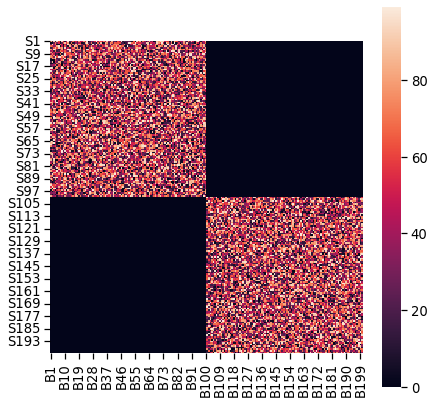

In [211]:
# Explore the data with a heatmap
plt.figure(figsize=(7,7))
sns.heatmap(biome, square=True)
plt.show()

You can observe that Samples S1-S100 seem to harbour a set of bacterial species while Samples S101-200 seem to harbour a completely different kind. <br>
Given that there are so many features(200!), perhaps we can use PCA to reduce our dimensions down to 2 - this should be easy!

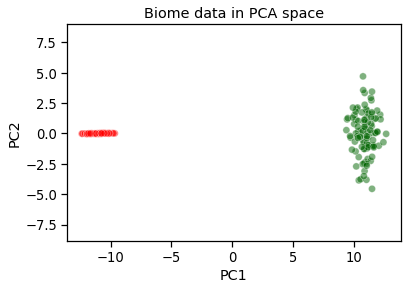

In [212]:
# perform data standardization
data = StandardScaler().fit_transform(biome)

# PCA with n=2
pca_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(data), 
                      columns = ['PC1', 'PC2'])

cluster_colors = ['red']*100 + ['darkgreen']*100 # for color coding samples 1-100 as one cluster and 101-200 as another

# plot your results
plt.figure()
sns.scatterplot(data=pca_df, x='PC1', y='PC2', 
                c = cluster_colors,     # color code clusters
                s = 50,                 # point size on plot
                alpha=0.5)              # point transparency on plot
plt.axis('equal')
plt.title('Biome data in PCA space')
plt.show()

### Example 2
<font color="crimson"> <b> <i>BONUS EXERCISE : </i></b> <br>
    Import the dataset `biome2.csv`, look at the feature heatmap and perform a data standardization and PCA on it.
</font> 

In [213]:
biome = pd.read_csv('biome2.csv', index_col=0)

In [ ]:
# Explore the data with a heatmap




In [171]:
# perform data standardization


# PCA with n=2



# plot your results



